#  **1. Load and Explore the Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# import csv files
df = pd.read_csv('/content/drive/MyDrive/EDA Dataset/Diwali Sales Data.csv', encoding = 'unicode_escape')
# to avoid encoding error, use 'unicode_escape'

In [19]:
# Display first 5 columns of Dataset
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [20]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Check Missing values & Datatypes**

In [21]:
#check null values
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [22]:
# Check duplicate values
df.duplicated().sum()

8

# **2. Data Cleaning & Preprocessing**

**Columns**:
  - `User_ID` - Unique customer identifier  
  - `Cust_name` - Customer name  
  - `Product_ID` - Unique product identifier  
  - `Gender` - Customer gender (`M` or `F`)  
  - `Age Group` - Age category (`0-17`, `18-25`, etc.)  
  - `Age` - Exact age of the customer  
  - `Marital_Status` - 0 (Single) or 1 (Married)  
  - `State` - State where the purchase was made  
  - `Zone` - Geographical zone (`North`, `South`, etc.)  
  - `Occupation` - Profession of the customer  
  - `Product_Category` - Type of product purchased  
  - `Orders` - Number of items purchased  
  - `Amount` - Total purchase amount (₹)  

**Things to be done**:

1. Remove unnecessary columns (unnamed1, Status) because it has Nan values.
2. Found missing values in columns (Amount = 12, Status	= 11251, unnamed1 =	11251).

3. Found 8 duplicate records in dataset.
4. Change "User_ID" column name to "Cust_ID".
5. Convert "Age Group", "Zone" column data type to "Category" datatype.

* drop(): Removes rows or columns from a DataFrame or Series based on labels or index values.

In [23]:
# Drop columns with 100% missing values
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [24]:
# Rows and Columns of dataset
df.shape

(11251, 13)

* dropna(): Removes rows or columns containing missing values (NaN).

In [25]:
# Check and drop Nan or missing values if any
df.dropna(inplace=True)

In [26]:
# Check and drop duplicates if any
df.drop_duplicates(inplace=True)

In [27]:
# Verify Nan or Missing Value
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [28]:
# Verify Nan or Missing Value
df.duplicated().sum()

0

In [29]:
# Change data type
df['Amount'] = df['Amount'].astype('int')

In [30]:
df['Amount'].dtypes

dtype('int64')

In [32]:
# Fill missing Amount values with median
df["Amount"] = df["Amount"].fillna(df["Amount"].median())

In [33]:
#rename column
df.rename(columns={'User_ID':'Cust_ID'})

,Cust_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [35]:
# Convert 'Age Group' to an ordered category
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_order, ordered=True)

In [37]:
print(df['Age Group'].dtypes)

category


# **3. Exploratory Data Analysis (EDA)**

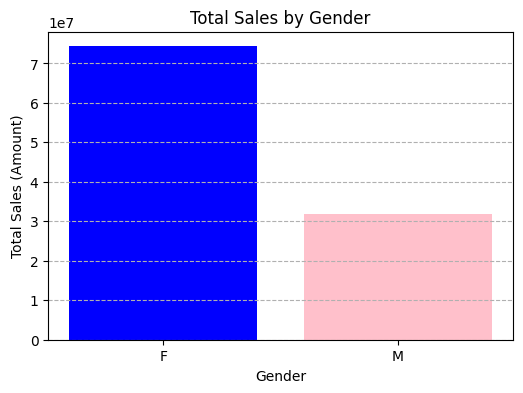

In [39]:
# Gender-wise Sales Analysis
plt.figure(figsize=(6, 4))
gender_sales = df.groupby("Gender")["Amount"].sum()
plt.bar(gender_sales.index, gender_sales.values, color=['blue', 'pink'])
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales (Amount)")
plt.grid(axis = "y", linestyle = "--")
plt.show()

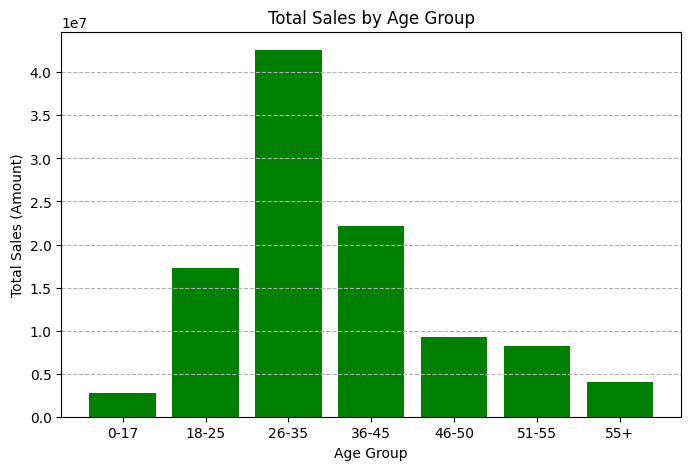

In [41]:
# Age Group Distribution
plt.figure(figsize=(8, 5))
age_sales = df.groupby("Age Group", observed=False)["Amount"].sum()
plt.bar(age_sales.index.astype(str), age_sales.values, color='green')
plt.title("Total Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Sales (Amount)")
plt.grid(axis = "y", linestyle = "--")
plt.show()

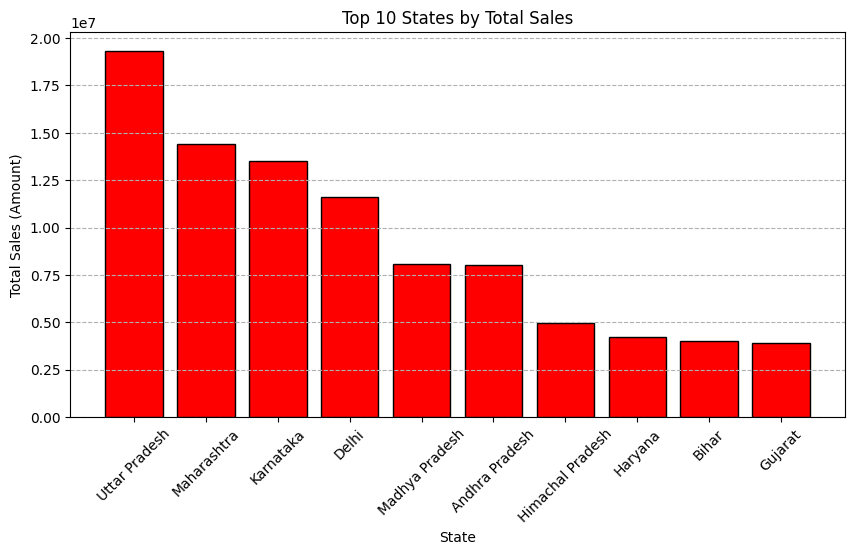

In [43]:
# Top 10 States by Sales
top_states = df.groupby("State")["Amount"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
plt.bar(top_states.index, top_states.values, color='red', edgecolor = "Black")
plt.title("Top 10 States by Total Sales")
plt.xlabel("State")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=45)
plt.grid(axis = "y", linestyle = "--")
plt.show()

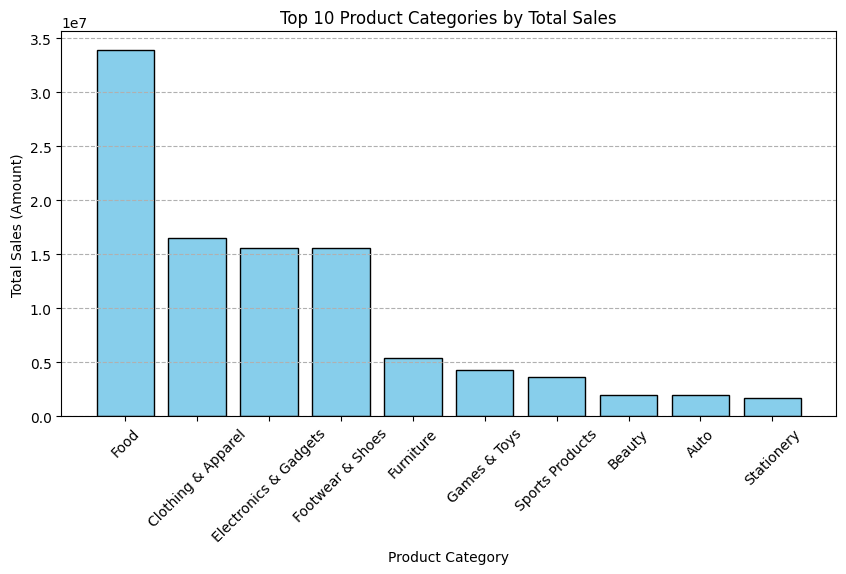

In [44]:
# Top 10 Product Categories by Sales
top_categories = df.groupby("Product_Category")["Amount"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
plt.bar(top_categories.index, top_categories.values, color='Skyblue', edgecolor = "Black" )
plt.title("Top 10 Product Categories by Total Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=45)
plt.grid(axis = "y", linestyle = "--")
plt.show()

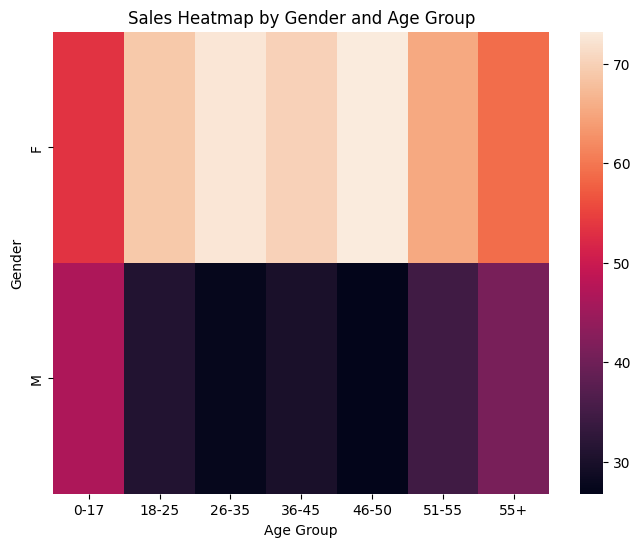

In [45]:
# Heatmap of Gender and Age Group
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df["Gender"], df["Age Group"], values=df["Amount"],aggfunc="sum",normalize= 'columns')*100)
plt.title("Sales Heatmap by Gender and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Gender")
plt.show()

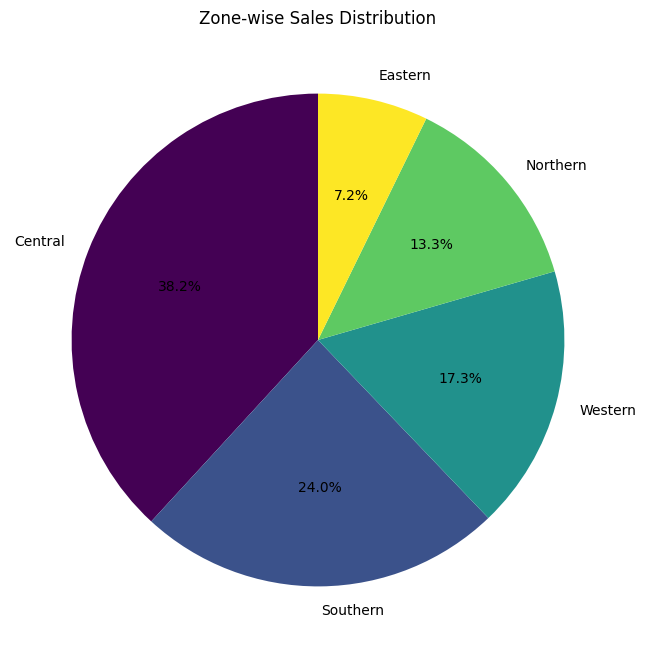

In [75]:
# Zone distribution
plt.figure(figsize= (10,8))
df['Zone'].value_counts().plot(kind='pie', autopct='%0.1f%%', colormap="viridis", startangle = 90)
plt.ylabel('')  # Remove default ylabel
plt.title("Zone-wise Sales Distribution")
plt.show()


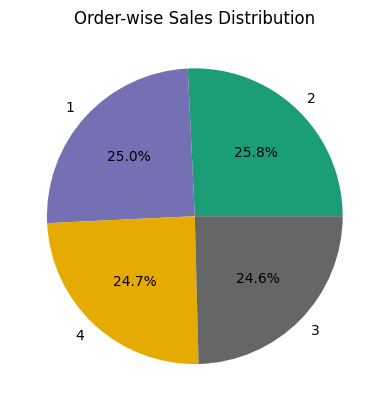

In [86]:
# Orders Distribution
df['Orders'].value_counts().plot(kind='pie', autopct='%0.1f%%',colormap = "Dark2")
plt.ylabel('')  # Remove default ylabel
plt.title("Order-wise Sales Distribution")
plt.show()

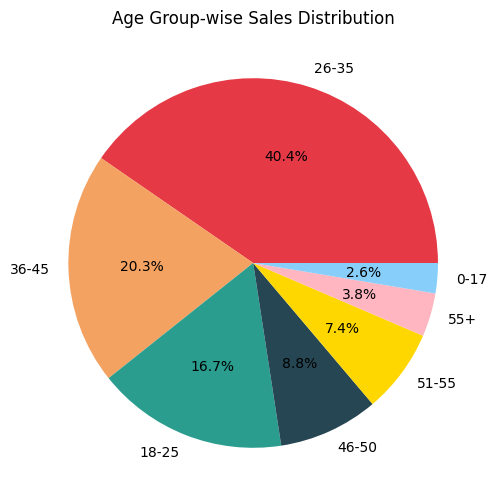

In [73]:
# Age Group Distribution
plt.figure(figsize = (10,6))
df['Age Group'].value_counts().plot(kind = 'pie' ,  autopct = '%0.1f%%',colors = ["#E63946", "#F4A261", "#2A9D8F", "#264653","#FFD700", "#FFB6C1", "#87CEFA"])
plt.ylabel('')  # Remove default ylabel
plt.title("Age Group-wise Sales Distribution")
plt.show()

In [88]:
# Save cleaned dataset for future use
df.to_csv("Diwali_Sales_Cleaned.csv", index=False)